# I. Data Pre-processing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

#### Remove rows with empty Sale Price

In [4]:
df = df[df['SalePrice'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Remove columns with more than 50% of data missing
df= df.dropna(axis='columns',thresh =0.5*1460)

# Find the  columns with missing values
df.columns[df.isnull().any()].tolist()

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [6]:
#  Fill the missing values with mean/ median as appropriate
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)
df['LotFrontage'].isnull().any()

False

In [7]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)
df['MasVnrArea'].isnull().any()

False

In [8]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)
df['GarageYrBlt'].isnull().any()

False

# II. EDA and Data Cleaning

### A) Exploration of correlations

In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [10]:
# Select columns of types float and int
df_numerical = df.select_dtypes(include = ['float64', 'int64'])
df_numerical.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0   208500.0  
1   181500.0  
2   223500.0  
3   140000.0  
4   250000.0  

[5 rows x 38 columns]

In [11]:
df_corr = pd.DataFrame(df.corr()['SalePrice']).sort_values(by='SalePrice',ascending=False)

# Take absolute value
df_corr['AbsoluteCorr'] = np.absolute(df_corr['SalePrice'])

# Sort values and drop the first line as Corr(SalePrice,SalePrice)=1
df_corr_abs = pd.DataFrame(df_corr['AbsoluteCorr'].sort_values(ascending=False)).iloc[1:,:]

# Display features most highly correlated to SalePrice
df_corr_abs[df_corr_abs['AbsoluteCorr']>=0.5]

AbsoluteCorr
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
FullBath          0.560664
TotRmsAbvGrd      0.533723
YearBuilt         0.522897
YearRemodAdd      0.507101

Text(0.5, 1.0, 'Top 10 features correlated with Sale Price')

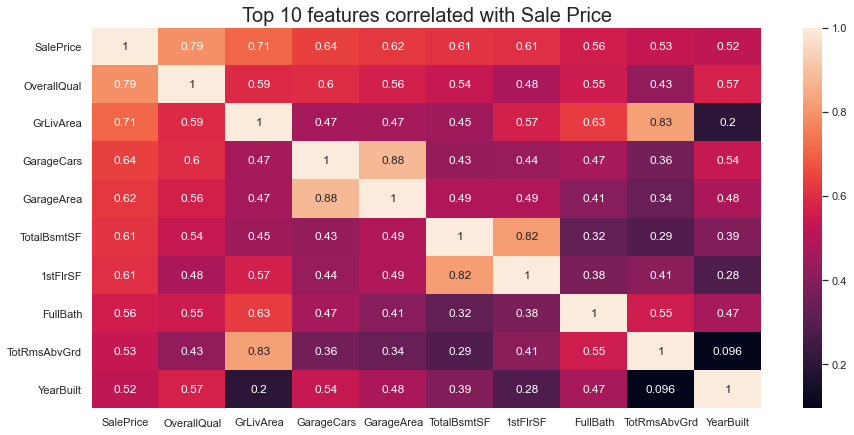

In [12]:
# Plotting top 10 highest correlation
high_corr = (abs(df.corr().SalePrice).sort_values(ascending=False)[:10]).index
sns.set(rc={'figure.figsize':(15,7)})
sns.heatmap(df[high_corr].corr(), annot=True)
sns.set(rc={'figure.figsize':(10,10)})
plt.title('Top 10 features correlated with Sale Price', fontsize=20)

### B) Exploration / Visualization

Text(0.5, 1.0, 'Sale Price as a function of the Lot Frontage')

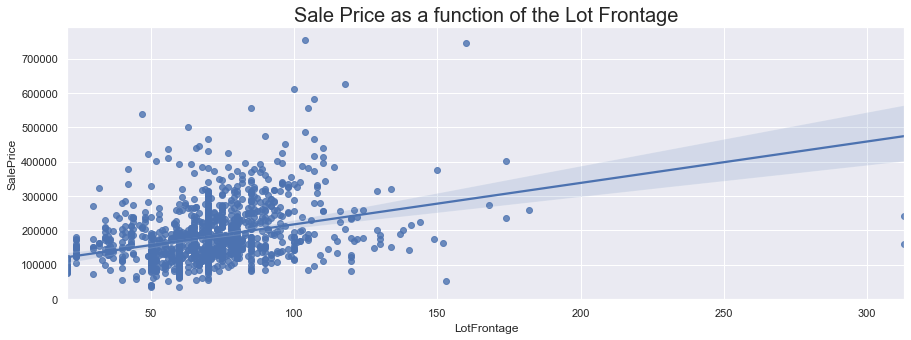

In [13]:
# Exploration of the correlation between lot frontage and Sale Price
sns.set(rc={'figure.figsize':(15,5)})
sns.regplot(data=df, x='LotFrontage', y='SalePrice')
plt.title('Sale Price as a function of the Lot Frontage', fontsize=20)

Text(0.5, 1.0, 'Sale Price as a function of the Lot Area')

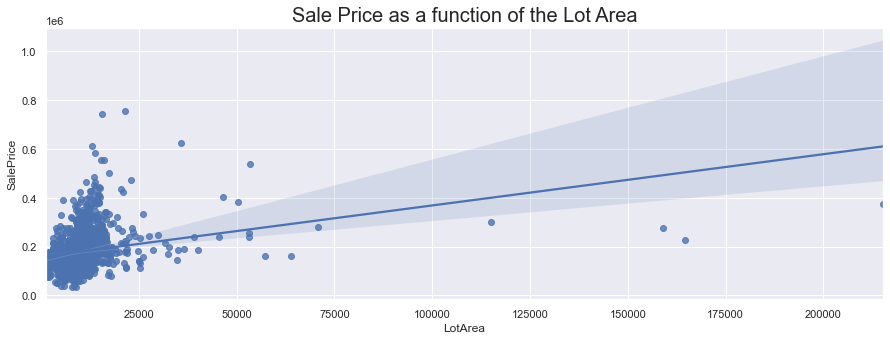

In [14]:
# Exploration of the correlation between lot area and Sale Price
sns.set(rc={'figure.figsize':(15,5)})
sns.regplot(data=df, x='LotArea', y='SalePrice')
plt.title('Sale Price as a function of the Lot Area', fontsize=20)

Now we see correlation of 'SalePrice' with few important and relevant features basis business sense

Text(0.5, 1.0, 'Sale Price as a function of the Total Basement Surface')

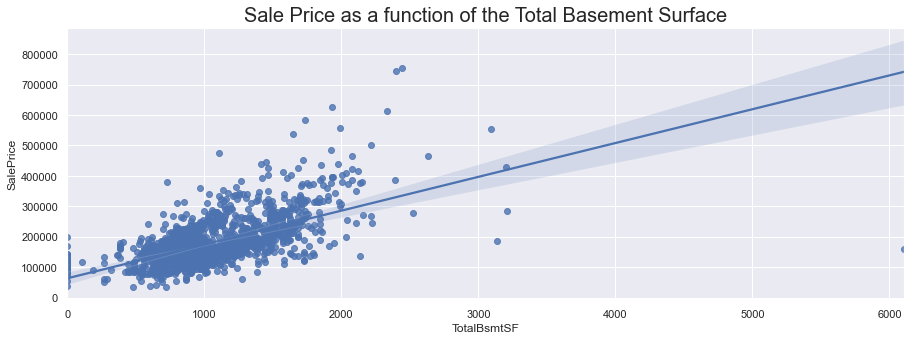

In [15]:
#Sale price v/s TotalBsmtSf
sns.set(rc={'figure.figsize':(15,5)})
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df)
plt.title('Sale Price as a function of the Total Basement Surface', fontsize=20)

Text(0.5, 1.0, 'Sale Price as a function of the Pool Area')

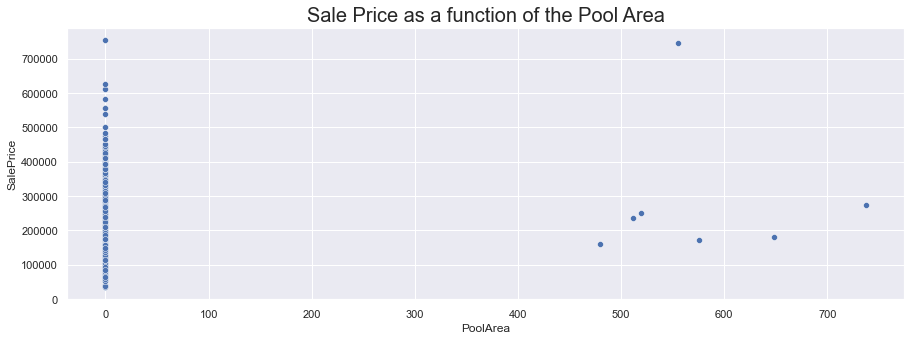

In [16]:
#Sale Price v/s PoolArea
sns.scatterplot(x='PoolArea', y='SalePrice', data=df)
plt.title('Sale Price as a function of the Pool Area', fontsize=20)

Text(0.5, 1.0, 'Boxplots of Sale Price by Overall Quality category')

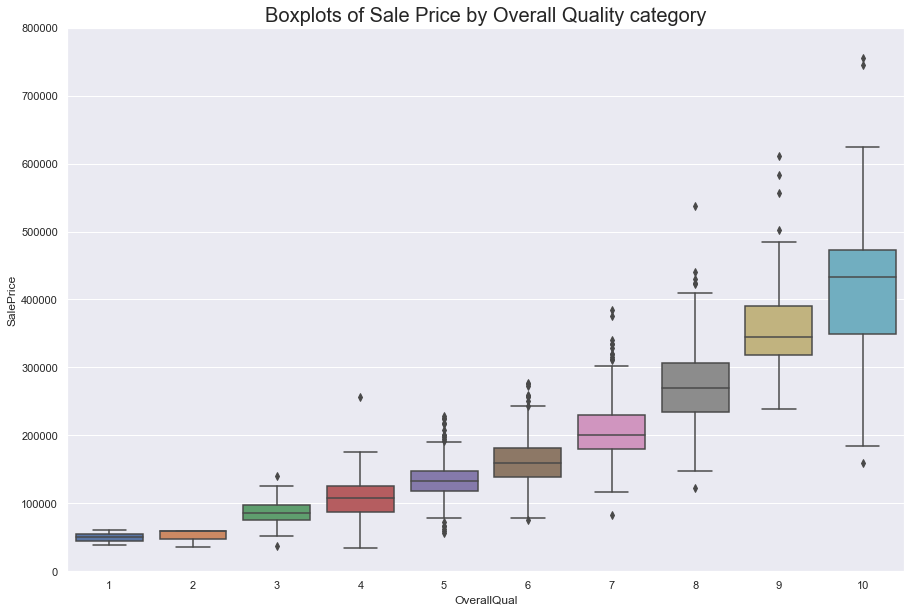

In [17]:
#Sale Price v/s QverallQual
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.title('Boxplots of Sale Price by Overall Quality category', fontsize=20)

Text(0.5, 1.0, 'Sale Price as a function of the above ground living area in square feet')

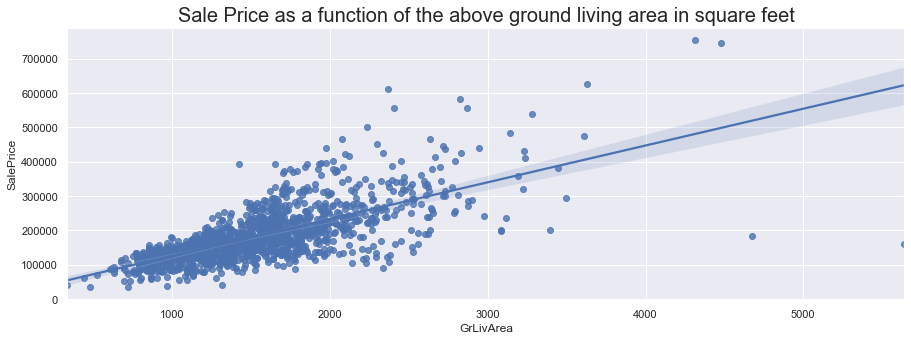

In [18]:
#Sale price v/s TotalBsmtSf
sns.set(rc={'figure.figsize':(15,5)})
sns.regplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Sale Price as a function of the above ground living area in square feet', fontsize=20)

# III. Lasso Regression

The dataset entails many features. It is reasonable to think that some of the features are not relevant or not significant and should not be included in our model.

Therefore, it is appropriate to use a Lasso Regression which can set the value of some coefficients to zero and exclude them from the regression.

In [19]:
# Drop the remaining columns with missing categorical values
df.drop(df.columns[df.isnull().any()].tolist(),axis=1, inplace=True)

In [20]:
#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# sklearn modules for data preprocessing:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# sklearn modules for Model Selection:
from sklearn import svm, linear_model
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve, r2_score, mean_squared_error

# yellowbrick
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

Encode categorical features

In [21]:
print("Number of categorical features: ",len(df.select_dtypes(include='object').columns))

Number of categorical features:  27


In [22]:
# Label Encode Categorical Features

#Create a label encoder object
le = LabelEncoder()
# Encode for all categorical features
le_count = 0
for col in df.columns[:-1]: # -1 because the last column in this example is the target variable
    if df[col].dtype == 'object':
        le.fit(df[col])
        df[col] = le.transform(df[col])
        le_count += 1
print('{} columns were label encoded.'.format(le_count))

27 columns were label encoded.


In [23]:
df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         3   
1   2          20         3         80.0     9600       1         3   
2   3          60         3         68.0    11250       1         0   
3   4          70         3         60.0     9550       1         0   
4   5          60         3         84.0    14260       1         0   

   LandContour  Utilities  LotConfig  ...  EnclosedPorch  3SsnPorch  \
0            3          0          4  ...              0          0   
1            3          0          2  ...              0          0   
2            3          0          4  ...              0          0   
3            3          0          0  ...            272          0   
4            3          0          2  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2008         8              4   
1            0         0        0       5    2007         8              4   
2            0         0        0       9    2008         8              4   
3            0         0        0       2    2006         8              0   
4            0         0        0      12    2008         8              4   

   SalePrice  
0   208500.0  
1   181500.0  
2   223500.0  
3   140000.0  
4   250000.0  

[5 rows x 65 columns]

### Train test split

In [24]:
# Create the training and test datasets
X = df.drop(['SalePrice','Id'], axis=1)
y = df[['SalePrice']]

# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check format of tables (check they have the same number of columns)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 63)
(365, 63)
(1095, 1)
(365, 1)


In [25]:
X_train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
1023         120         3    43.000000     3182       1         3   
810           20         3    78.000000    10140       1         3   
1384          50         3    60.000000     9060       1         3   
626           20         3    70.049958    12342       1         0   
813           20         3    75.000000     9750       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...  OpenPorchSF  \
1023            3          0          4          0  ...           20   
810             3          0          4          0  ...            0   
1384            3          0          4          0  ...            0   
626             3          0          4          0  ...            0   
813             3          0          4          0  ...            0   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
1023              0          0            0         0        0       5   
810               0          0            0       648        0       1   
1384              0          0            0         0        0      10   
626              36          0            0         0      600       8   
813             275          0            0         0      500       4   

      YrSold  SaleType  SaleCondition  
1023    2008         8              4  
810     2006         8              4  
1384    2009         8              4  
626     2007         8              4  
813     2007         0              4  

[5 rows x 63 columns]

### Feature scaling (standardization)

[Theoretical precisions on feature scaling:](https://datascience.stackexchange.com/questions/54908/data-normalization-before-or-after-train-test-split/54909)

- Normalization should be done **after splitting the data between training and test set**, using only the data from the training set. 

- This to be accessible at the training stage. Using any information coming from the test set before or during training is a **potential bias** in the evaluation of the performance

- Then, when normalizing the test set, **one should apply the normalization parameters previously obtained from the training set as-is**. ***Do not recalculate them on the test set***, because they would be inconsistent with the model and this would produce wrong predictions.

Source of [code below](https://scikit-learn.org/0.18/auto_examples/preprocessing/plot_robust_scaling.html); we use RobustScaler because our data contains many outliers. RobustScaler will remove the median and will scale the data according to the quantile range.

In [26]:
from sklearn.preprocessing import RobustScaler

# Default quantile range is 25% to 75%
robust_scaler = RobustScaler()
X_train_r = pd.DataFrame(robust_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_r = pd.DataFrame(robust_scaler.transform(X_test), columns=X_test.columns)

X_train_r.head() # To compare with X_train before Scaling

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0         1.4       0.0    -1.423682 -1.561177     0.0       0.0          0.0   
1        -0.6       0.0     0.418423  0.131355     0.0       0.0          0.0   
2         0.0       0.0    -0.528945 -0.131355     0.0       0.0          0.0   
3        -0.6       0.0     0.000000  0.666991     0.0      -1.0          0.0   
4        -0.6       0.0     0.260529  0.036487     0.0       0.0          0.0   

   Utilities  LotConfig  LandSlope  ...  OpenPorchSF  EnclosedPorch  \
0        0.0        0.0        0.0  ...    -0.094595            0.0   
1        0.0        0.0        0.0  ...    -0.364865            0.0   
2        0.0        0.0        0.0  ...    -0.364865            0.0   
3        0.0        0.0        0.0  ...    -0.364865           36.0   
4        0.0        0.0        0.0  ...    -0.364865          275.0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  SaleType  \
0        0.0          0.0       0.0      0.0 -0.333333     0.0       0.0   
1        0.0          0.0     648.0      0.0 -1.666667    -1.0       0.0   
2        0.0          0.0       0.0      0.0  1.333333     0.5       0.0   
3        0.0          0.0       0.0    600.0  0.666667    -0.5       0.0   
4        0.0          0.0       0.0    500.0 -0.666667    -0.5      -8.0   

   SaleCondition  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 63 columns]

In [27]:
y_train_r = pd.DataFrame(robust_scaler.fit_transform(y_train), columns=y_train.columns)
y_test_r = pd.DataFrame(robust_scaler.transform(y_test), columns=y_test.columns)

### Modelization

In [28]:
# Use ScikitLearn's Lasso CV : both Lasso and CV 
from sklearn.linear_model import LassoCV

kf = KFold(shuffle=True, n_splits=5, random_state=0)
model = LassoCV(alphas= np.arange(0.0001,2,0.001),cv=kf, n_jobs=3)
model.fit(X_train_r, y_train_r)

print("Estimated regularization parameter alpha: %s" % model.alpha_)
print("Estimated coefficients: %s" % model.coef_)

Estimated regularization parameter alpha: 0.0101
Estimated coefficients: [-8.56685735e-02 -5.87463880e-04 -2.36340437e-02  2.39258419e-02
  0.00000000e+00 -1.25331682e-03  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  2.12925616e-02  0.00000000e+00
 -0.00000000e+00 -1.53237305e-02 -0.00000000e+00  3.43370976e-01
  2.92274909e-02  1.49670235e-01  2.22830070e-02  1.42645266e-02
  1.20846346e-02 -0.00000000e+00 -0.00000000e+00  2.25003264e-02
 -1.24932119e-01  0.00000000e+00  0.00000000e+00  7.94117815e-02
  3.22479350e-05 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.41583103e-02  0.00000000e+00
 -2.01555264e-04  3.36685672e-01  8.85963643e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.49860556e-03 -0.00000000e+00
 -1.31705965e-01  1.33064678e-02  3.30242125e-02  5.33389272e-02
  0.00000000e+00  1.51978341e-01  2.28356692e-03  0.00000000e+00
  4.45480445e-02 -0.00000000e+00 -1.57688667e-04  6.16563977e-04
  7.66036911e-04 

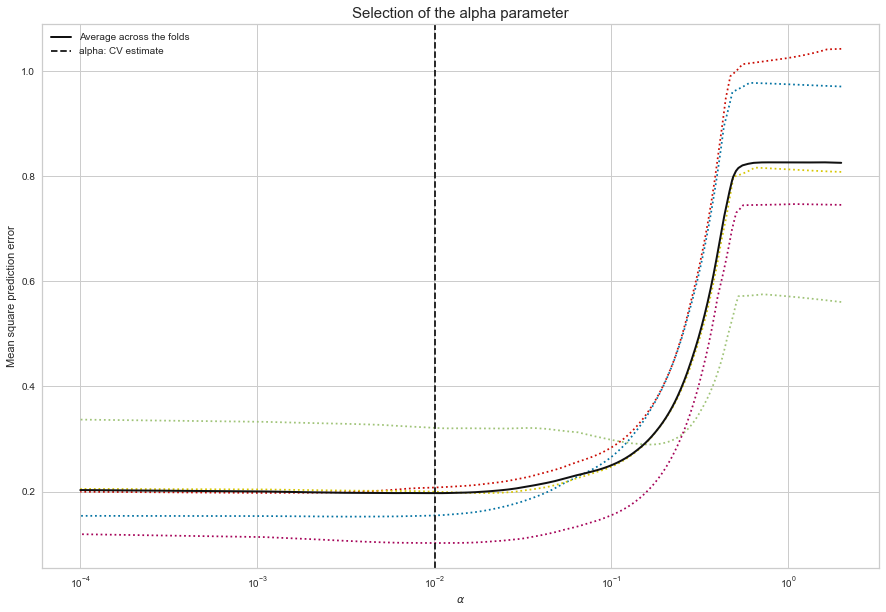

In [29]:
# Display results
sns.set_style('whitegrid')
plt.figure(figsize=(15, 10))
plt.semilogx(model.alphas_, model.mse_path_, ':')
plt.semilogx(model.alphas_, model.mse_path_.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square prediction error')
plt.title('Selection of the alpha parameter', fontsize=15)
plt.show(block=False)

In [30]:
# Calculate coefficients
coeff = pd.DataFrame(X_train_r.columns)
coeff.rename(columns={coeff.columns[0]: "Var Name"}, inplace=True)
coeff['Coefficient Estimate'] = pd.Series(model.coef_)
coeff.head()

Var Name  Coefficient Estimate
0   MSSubClass             -0.085669
1     MSZoning             -0.000587
2  LotFrontage             -0.023634
3      LotArea              0.023926
4       Street              0.000000

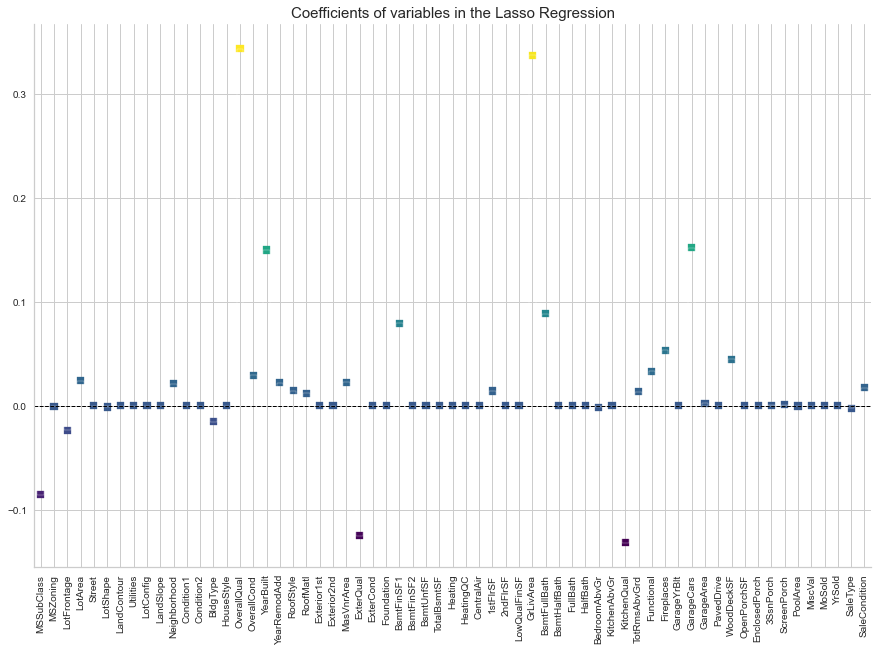

In [31]:
# Display results
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style('whitegrid')
sns.despine()
coeff.plot(x='Var Name', y='Coefficient Estimate', kind='bar', 
             ax=ax, color='none', legend=False)
ax.set_ylabel('')
#ax.set_xlabel('')
ax.set(xlabel=None)
ax.set_title('Coefficients of variables in the Lasso Regression', fontsize=15)
ax.scatter(x=pd.np.arange(coeff.shape[0]), 
           marker='s', s=50, 
           y=coeff['Coefficient Estimate'], c=coeff['Coefficient Estimate'], cmap='viridis')
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
#ax.xaxis.set_ticks_position('none')
#_ = ax.set_xticklabels(coeff['Var Name'].tolist(), 
#                       rotation=45, fontsize=10)

In [32]:
# Print list of features with coefficient equal to zero
print(len(coeff[coeff['Coefficient Estimate']==0]), "coefficients are set to zero by the Lasso regression")
coeff[coeff['Coefficient Estimate']==0]

27 coefficients are set to zero by the Lasso regression


Var Name  Coefficient Estimate
4         Street                   0.0
6    LandContour                   0.0
7      Utilities                  -0.0
8      LotConfig                  -0.0
9      LandSlope                   0.0
11    Condition1                   0.0
12    Condition2                  -0.0
14    HouseStyle                  -0.0
21   Exterior1st                  -0.0
22   Exterior2nd                  -0.0
25     ExterCond                   0.0
26    Foundation                   0.0
29     BsmtUnfSF                  -0.0
30   TotalBsmtSF                   0.0
31       Heating                  -0.0
32     HeatingQC                  -0.0
33    CentralAir                   0.0
35      2ndFlrSF                   0.0
39  BsmtHalfBath                  -0.0
40      FullBath                   0.0
41      HalfBath                   0.0
43  KitchenAbvGr                  -0.0
48   GarageYrBlt                   0.0
51    PavedDrive                   0.0
53   OpenPorchSF                  -0.0
59        MoSold                  -0.0
60        YrSold                  -0.0

In [33]:
# Print list of features kept in the model
print(len(coeff[coeff['Coefficient Estimate']!=0]), "coefficients are not set to zero by the Lasso regression")

# Print coefficients
coeff[coeff['Coefficient Estimate']!=0]

36 coefficients are not set to zero by the Lasso regression


Var Name  Coefficient Estimate
0      MSSubClass             -0.085669
1        MSZoning             -0.000587
2     LotFrontage             -0.023634
3         LotArea              0.023926
5        LotShape             -0.001253
10   Neighborhood              0.021293
13       BldgType             -0.015324
15    OverallQual              0.343371
16    OverallCond              0.029227
17      YearBuilt              0.149670
18   YearRemodAdd              0.022283
19      RoofStyle              0.014265
20       RoofMatl              0.012085
23     MasVnrArea              0.022500
24      ExterQual             -0.124932
27     BsmtFinSF1              0.079412
28     BsmtFinSF2              0.000032
34       1stFlrSF              0.014158
36   LowQualFinSF             -0.000202
37      GrLivArea              0.336686
38   BsmtFullBath              0.088596
42   BedroomAbvGr             -0.001499
44    KitchenQual             -0.131706
45   TotRmsAbvGrd              0.013306
46     Functional              0.033024
47     Fireplaces              0.053339
49     GarageCars              0.151978
50     GarageArea              0.002284
52     WoodDeckSF              0.044548
54  EnclosedPorch             -0.000158
55      3SsnPorch              0.000617
56    ScreenPorch              0.000766
57       PoolArea             -0.000248
58        MiscVal             -0.000039
61       SaleType             -0.002277
62  SaleCondition              0.017095

### Model performance

In [34]:
print('\n Alpha:', model.alpha_)
print('\n Coeffs:', model.coef_)  

print('\n In-sample R^2:', model.score(X_train, y_train))  
print('Out-of-sample R^2:', model.score(X_test, y_test))


 Alpha: 0.0101

 Coeffs: [-8.56685735e-02 -5.87463880e-04 -2.36340437e-02  2.39258419e-02
  0.00000000e+00 -1.25331682e-03  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  2.12925616e-02  0.00000000e+00
 -0.00000000e+00 -1.53237305e-02 -0.00000000e+00  3.43370976e-01
  2.92274909e-02  1.49670235e-01  2.22830070e-02  1.42645266e-02
  1.20846346e-02 -0.00000000e+00 -0.00000000e+00  2.25003264e-02
 -1.24932119e-01  0.00000000e+00  0.00000000e+00  7.94117815e-02
  3.22479350e-05 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  1.41583103e-02  0.00000000e+00
 -2.01555264e-04  3.36685672e-01  8.85963643e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.49860556e-03 -0.00000000e+00
 -1.31705965e-01  1.33064678e-02  3.30242125e-02  5.33389272e-02
  0.00000000e+00  1.51978341e-01  2.28356692e-03  0.00000000e+00
  4.45480445e-02 -0.00000000e+00 -1.57688667e-04  6.16563977e-04
  7.66036911e-04 -2.48035245e-04 -3.93541130e-05 -0.00000000e+00

In [35]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(type(train_pred))
print(type(y_train))

print(type(test_pred))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [36]:
# In-sample
train_pred = model.predict(X_train)

y_train=y_train.to_numpy().reshape(y_train.shape[0],1)
train_pred=train_pred.reshape(train_pred.shape[0],1)

root_MSE_train = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
MAPE_train = np.mean(np.abs((y_train - train_pred) / np.abs(y_train)))

# Out-of-sample
test_pred = model.predict(X_test)

y_test=y_test.to_numpy().reshape(y_test.shape[0],1)
test_pred=test_pred.reshape(test_pred.shape[0],1)

root_MSE_test = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
MAPE_test = np.mean(np.abs((y_test - test_pred) / np.abs(y_test)))

print('In-sample root MSE:', root_MSE_train)
print('Out-of-sample root MSE:', root_MSE_test)

print('In-sample MAPE:', round(MAPE_train*100,2),'%')
print('Out-of-sample MAPE:', round(MAPE_test*100,2),'%')

In-sample root MSE: 196555.59303563443
Out-of-sample root MSE: 196090.4195394374
In-sample MAPE: 99.3 %
Out-of-sample MAPE: 99.3 %


<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

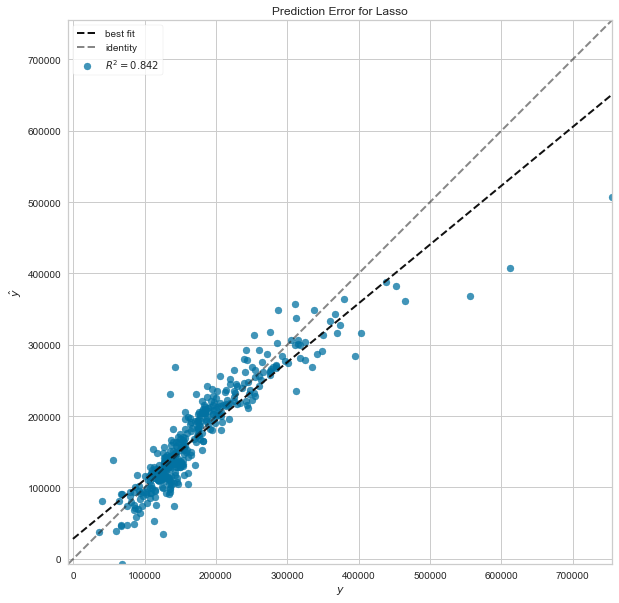

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))

from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
Lm = Lasso(alpha=0.0101) # input the chosen alpha
visualizer = PredictionError(Lm) 
# fit visualizer on training data
visualizer.fit(X_train, y_train) 
#Evaluate on test data
visualizer.score(X_test, y_test)
#show the plot and save in given path
visualizer.show("prediction_error.jpg")

<AxesSubplot:title={'center':'Feature Importances of 63 Features using LassoCV'}, xlabel='coefficient value'>

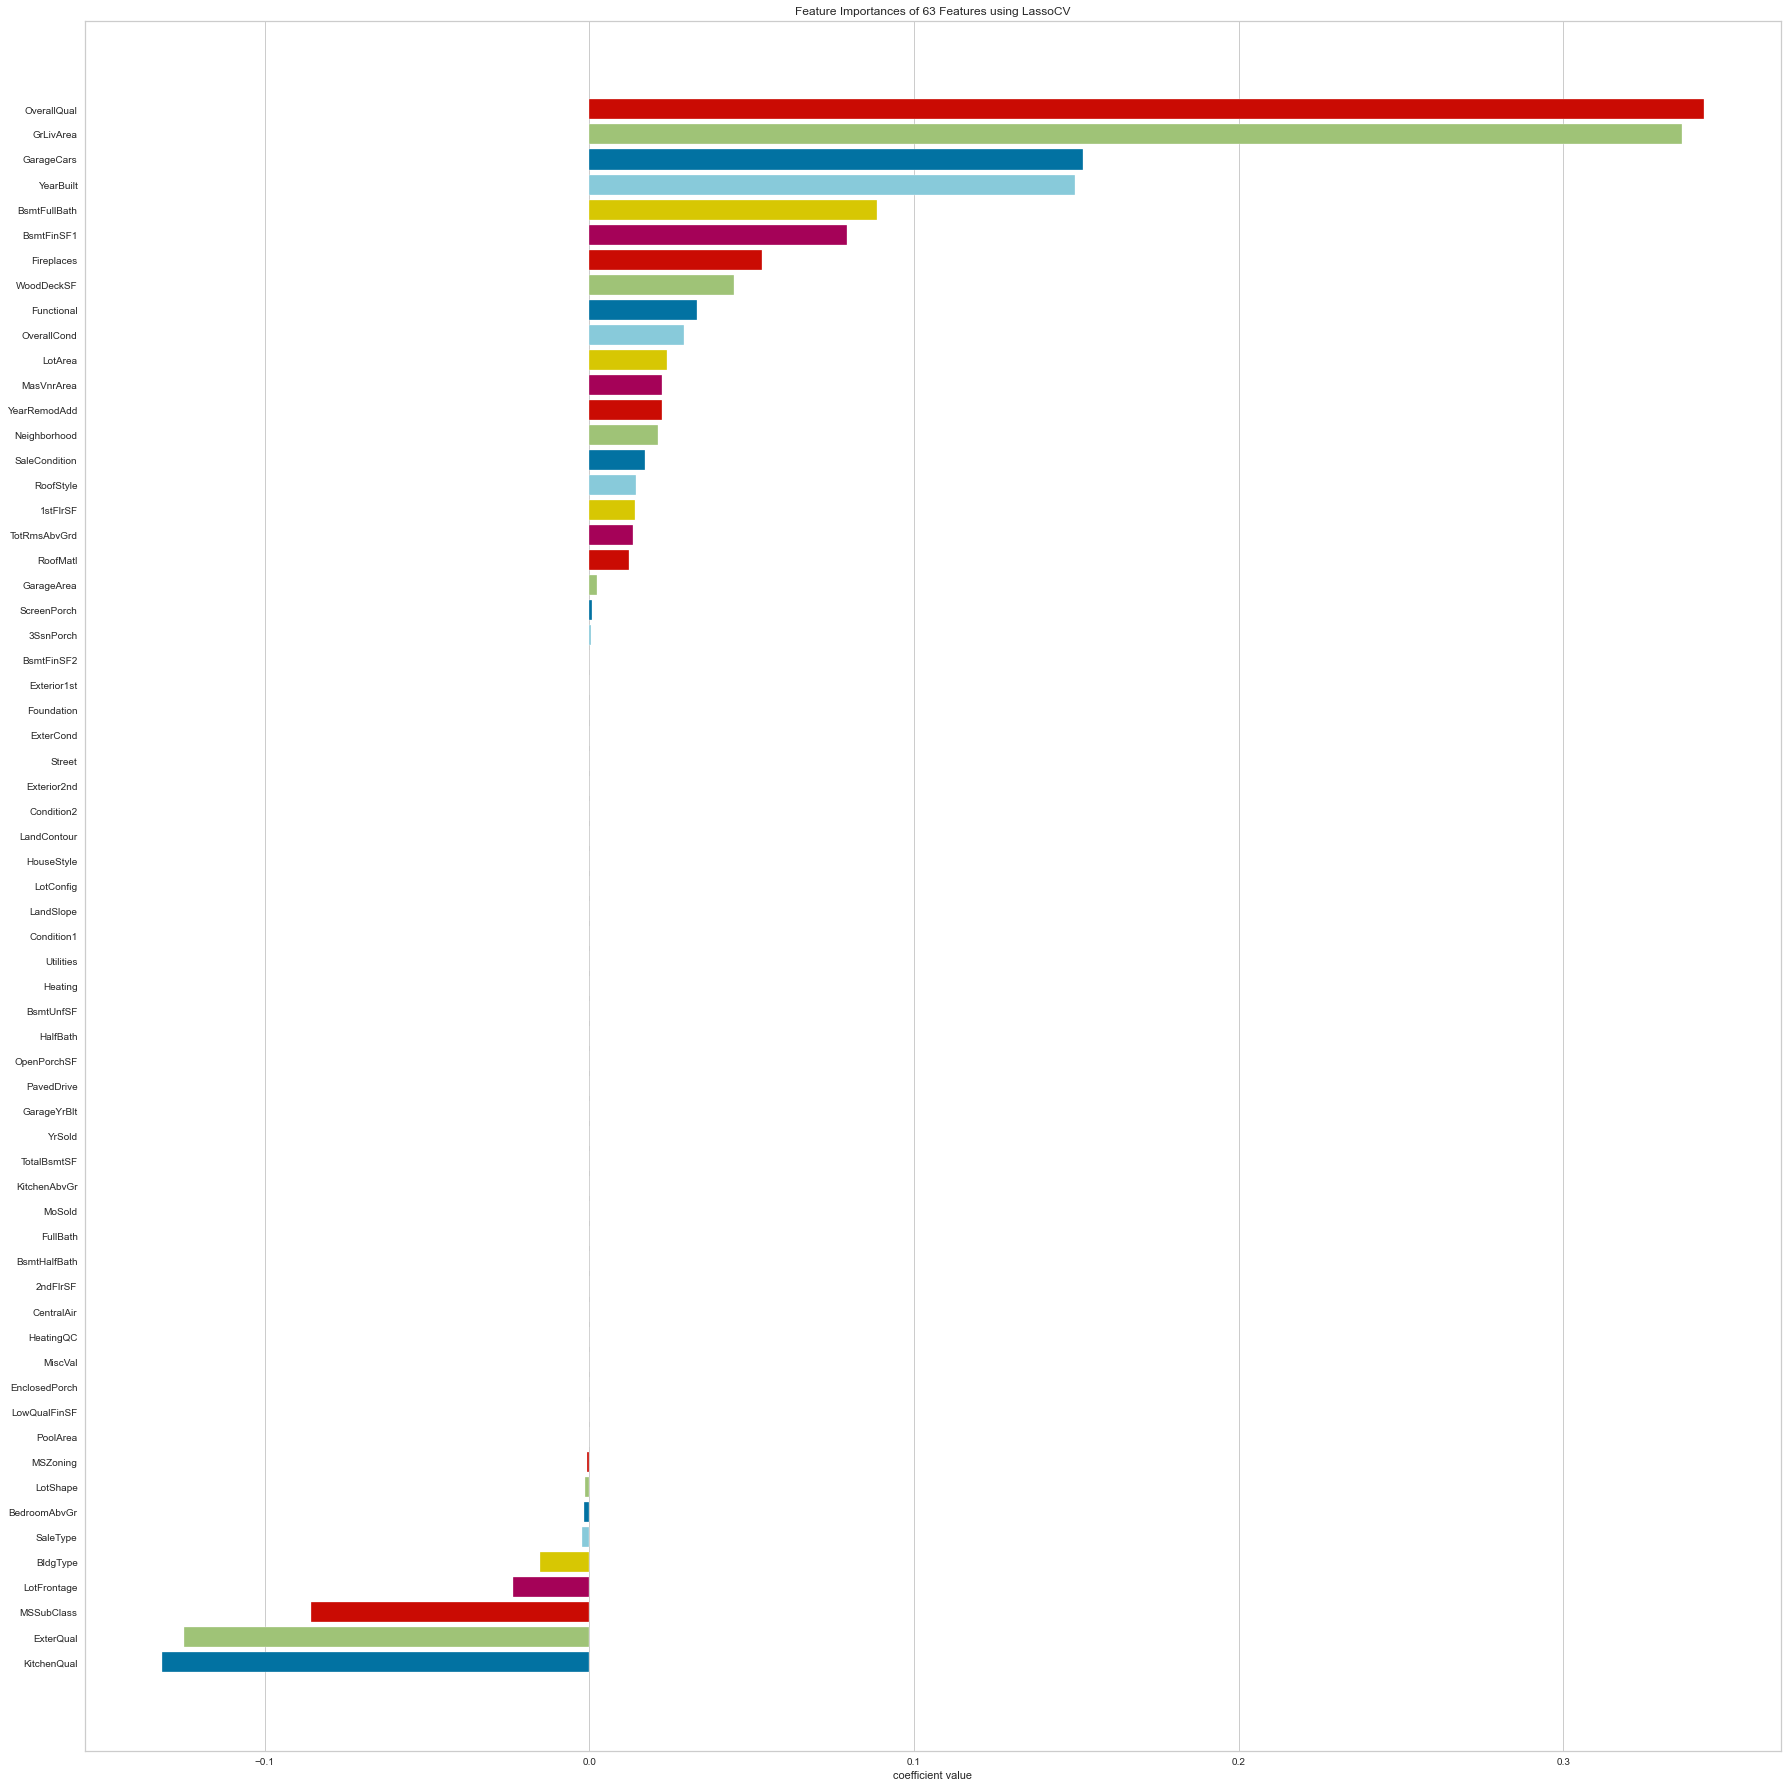

In [38]:
fig, ax = plt.subplots(figsize=(25, 25))

from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(model,relative=False)
#fit on train dataset
viz.fit(X_train, y_train)
#show plot and save at output path
viz.show("feature_importance.jpg")

# IV. Decision Trees Classifier

The target variable 'SalePrice' has values ranging from 35K to 755K dollars. We divided the range of sale price values into three classes - Low, Medium & High, so it can be used in BAU settings. Further, in order to predict the class in which a particular house property falls in, we will be performing Decision Tree Classification analysis.

In [39]:
# Dividing the SalePrice into three classes, based on 25th & 75th percentile
y = pd.cut(df['SalePrice'],bins=[0,np.percentile(df['SalePrice'],25),np.percentile(df['SalePrice'],75),
                                 df['SalePrice'].max()],labels=['Low','Medium','High'])
df['Sale Price Categories'] = y

In [40]:
#Splitting the data into train and test set
X = df.drop(['SalePrice','Id','Sale Price Categories'], axis=1)
y = df[['Sale Price Categories']]

# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [41]:
# Running Decision Trees model with default parameters
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7726027397260274


In [42]:
#! pip install graphviz

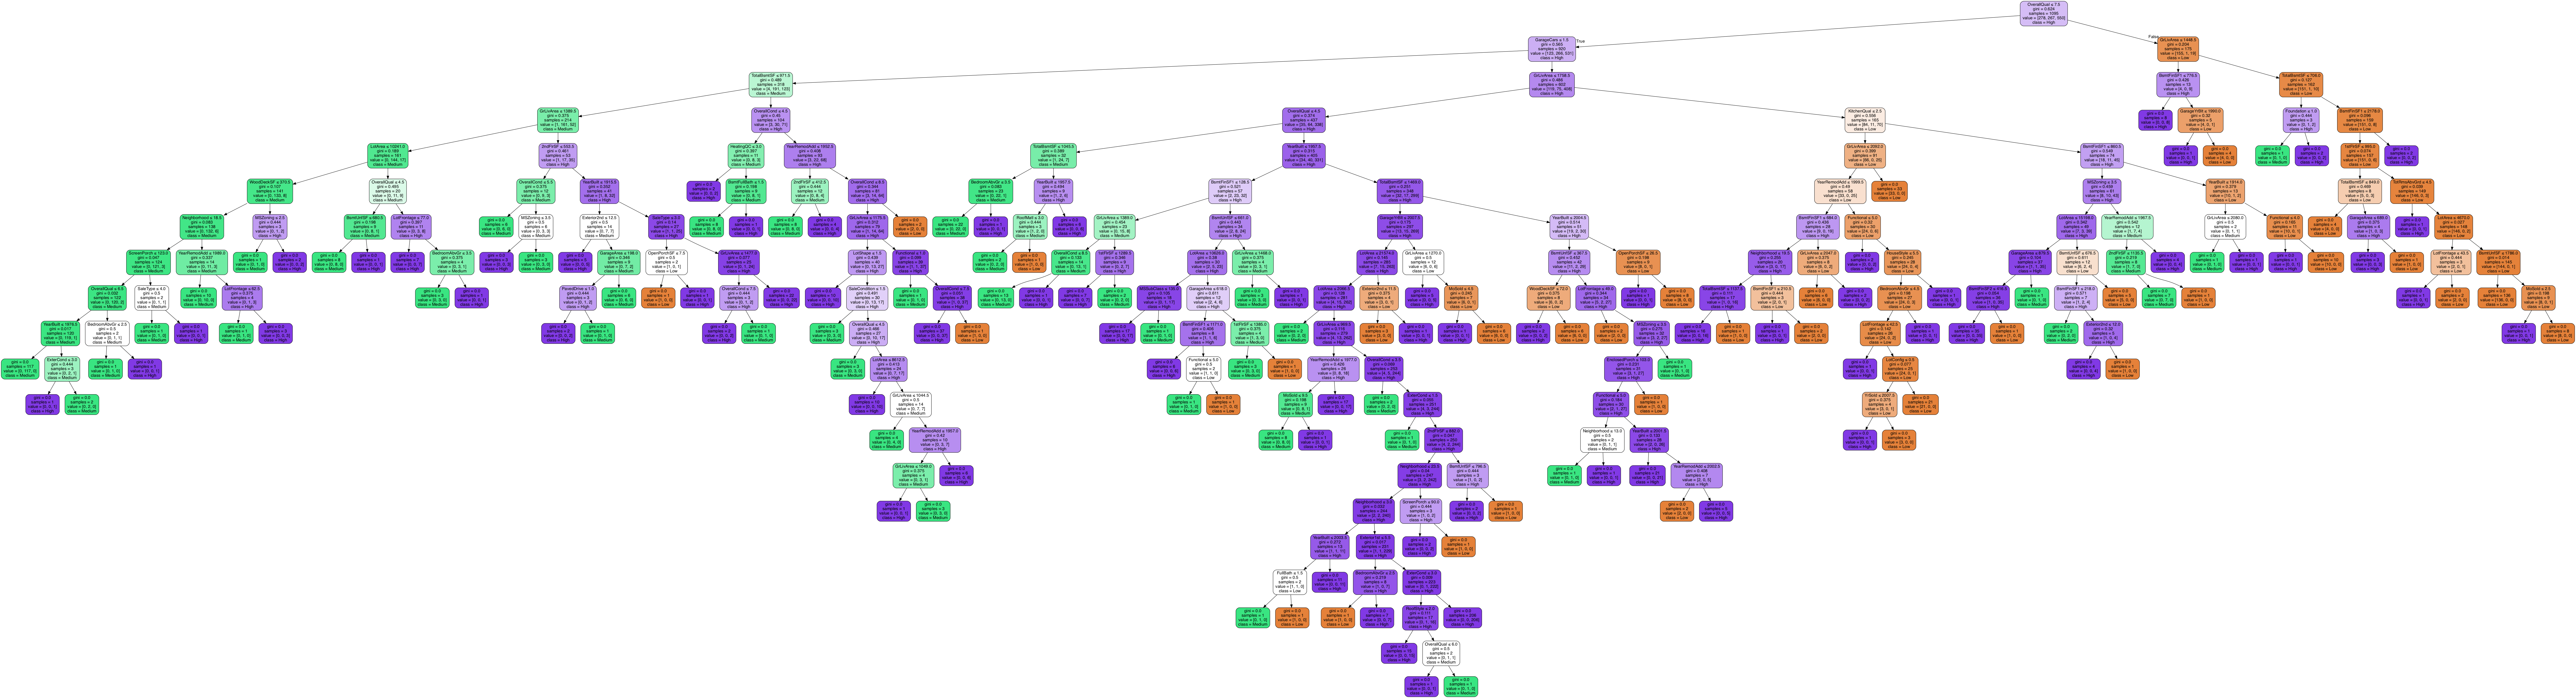

In [43]:
# Visualizing the decision tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['Low','Medium','High'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('housing.png')
Image(graph.create_png())

In [44]:
# Optimizing Decision Tree performance through GridSearchCV
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,200,250,300,400,500],
             'min_samples_leaf': [0,1,2,3,4,5], 'min_samples_split': [0,1,2,3,4,5]}
dtr = DecisionTreeClassifier()
clf = GridSearchCV(dtr, tree_para, scoring = 'accuracy')
clf.fit(X_train, y_train)
print("Best Decision Tree Model: " + str(clf.best_estimator_))
print("Decision Tree Accuracy Score: ",clf.best_score_)

Best Decision Tree Model: DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=4)
Decision Tree Accuracy Score:  0.7698630136986301


In [45]:
# Running Decision Tree Model with the chosen parameters from GridSearch
clf = clf.best_estimator_
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

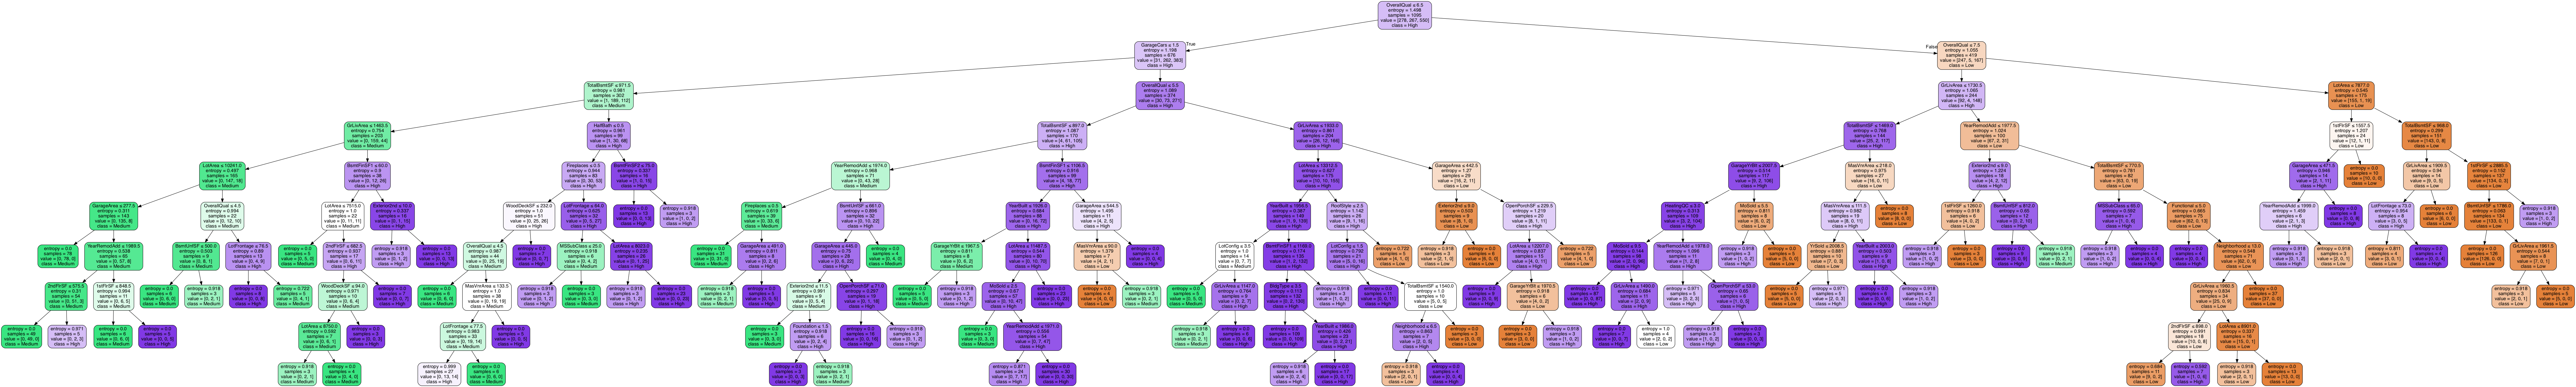

In [46]:
# Visualizing the optimal decision tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['Low','Medium','High'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('optimal_tree.png')
Image(graph.create_png())

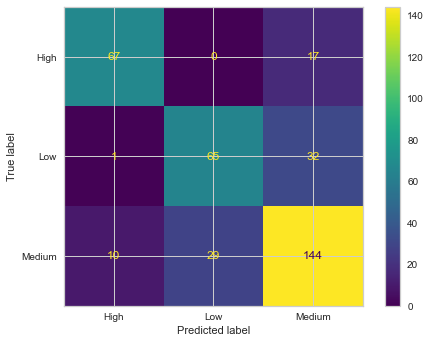

In [47]:
# Evaluation of performance through confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

As we see from the above, out of 84 properties belonging to the high class group, the Decision Tree Classifier classified 69 of them correctly, with an accuracy of  over 82%. Likewise, out of 98 properties belonging to low class group, the Decision Tree Classifier classified 73 of them correctly, with an accuracy of 74%.